In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
data = pd.read_csv("/content/drive/MyDrive/auto-mpg.data")

In [18]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [21]:
# Reading the .data file using pandas
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']
df = pd.read_csv('/content/drive/MyDrive/auto-mpg.data', names=cols, na_values = "?",comment = '\t',sep= " ",skipinitialspace=True)
data = df.copy()

In [22]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [23]:
# Checking for Data Type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [24]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [25]:
# Checking for all the null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

<Axes: xlabel='MPG'>

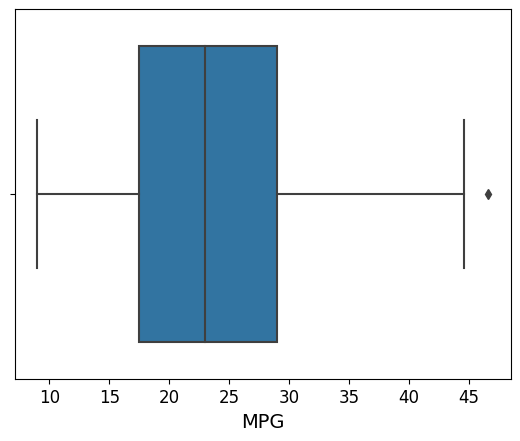

In [26]:
# Checking for Outliers
sns.boxplot(x=data['MPG'])

<Axes: xlabel='Displacement'>

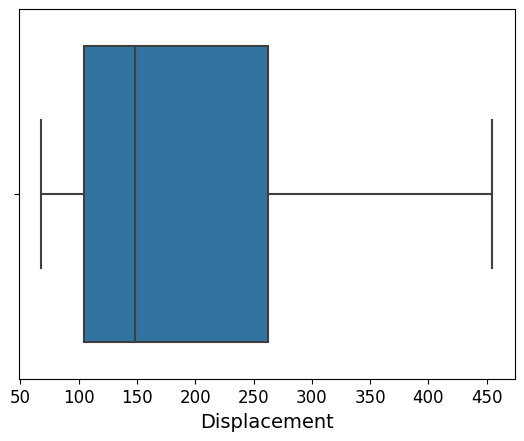

In [27]:
sns.boxplot(x=data['Displacement'])

<Axes: xlabel='Horsepower'>

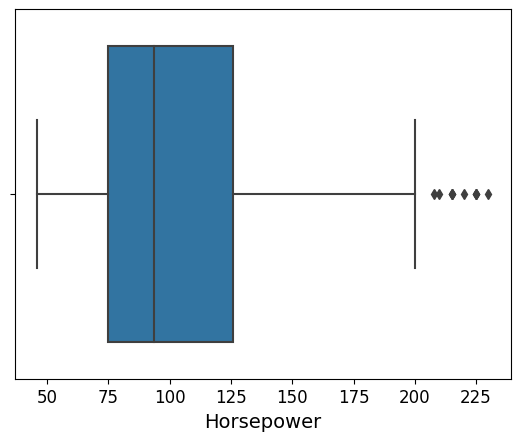

In [28]:
sns.boxplot(x=data['Horsepower'])

<Axes: xlabel='Weight'>

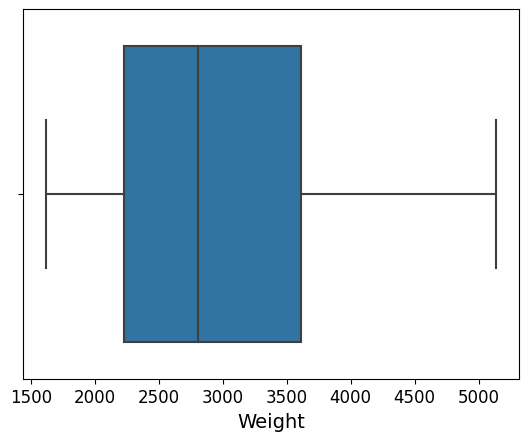

In [29]:
sns.boxplot(x=data['Weight'])

<Axes: xlabel='Acceleration'>

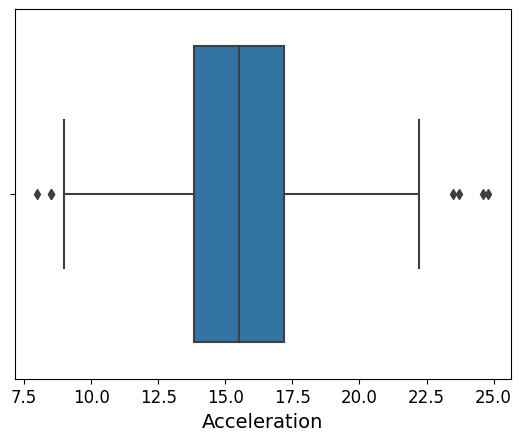

In [30]:
sns.boxplot(x=data['Acceleration'])

In [31]:
# Imputing the missing values in Horsepower attribute with median
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


Saving figure attribute_histogram_plots


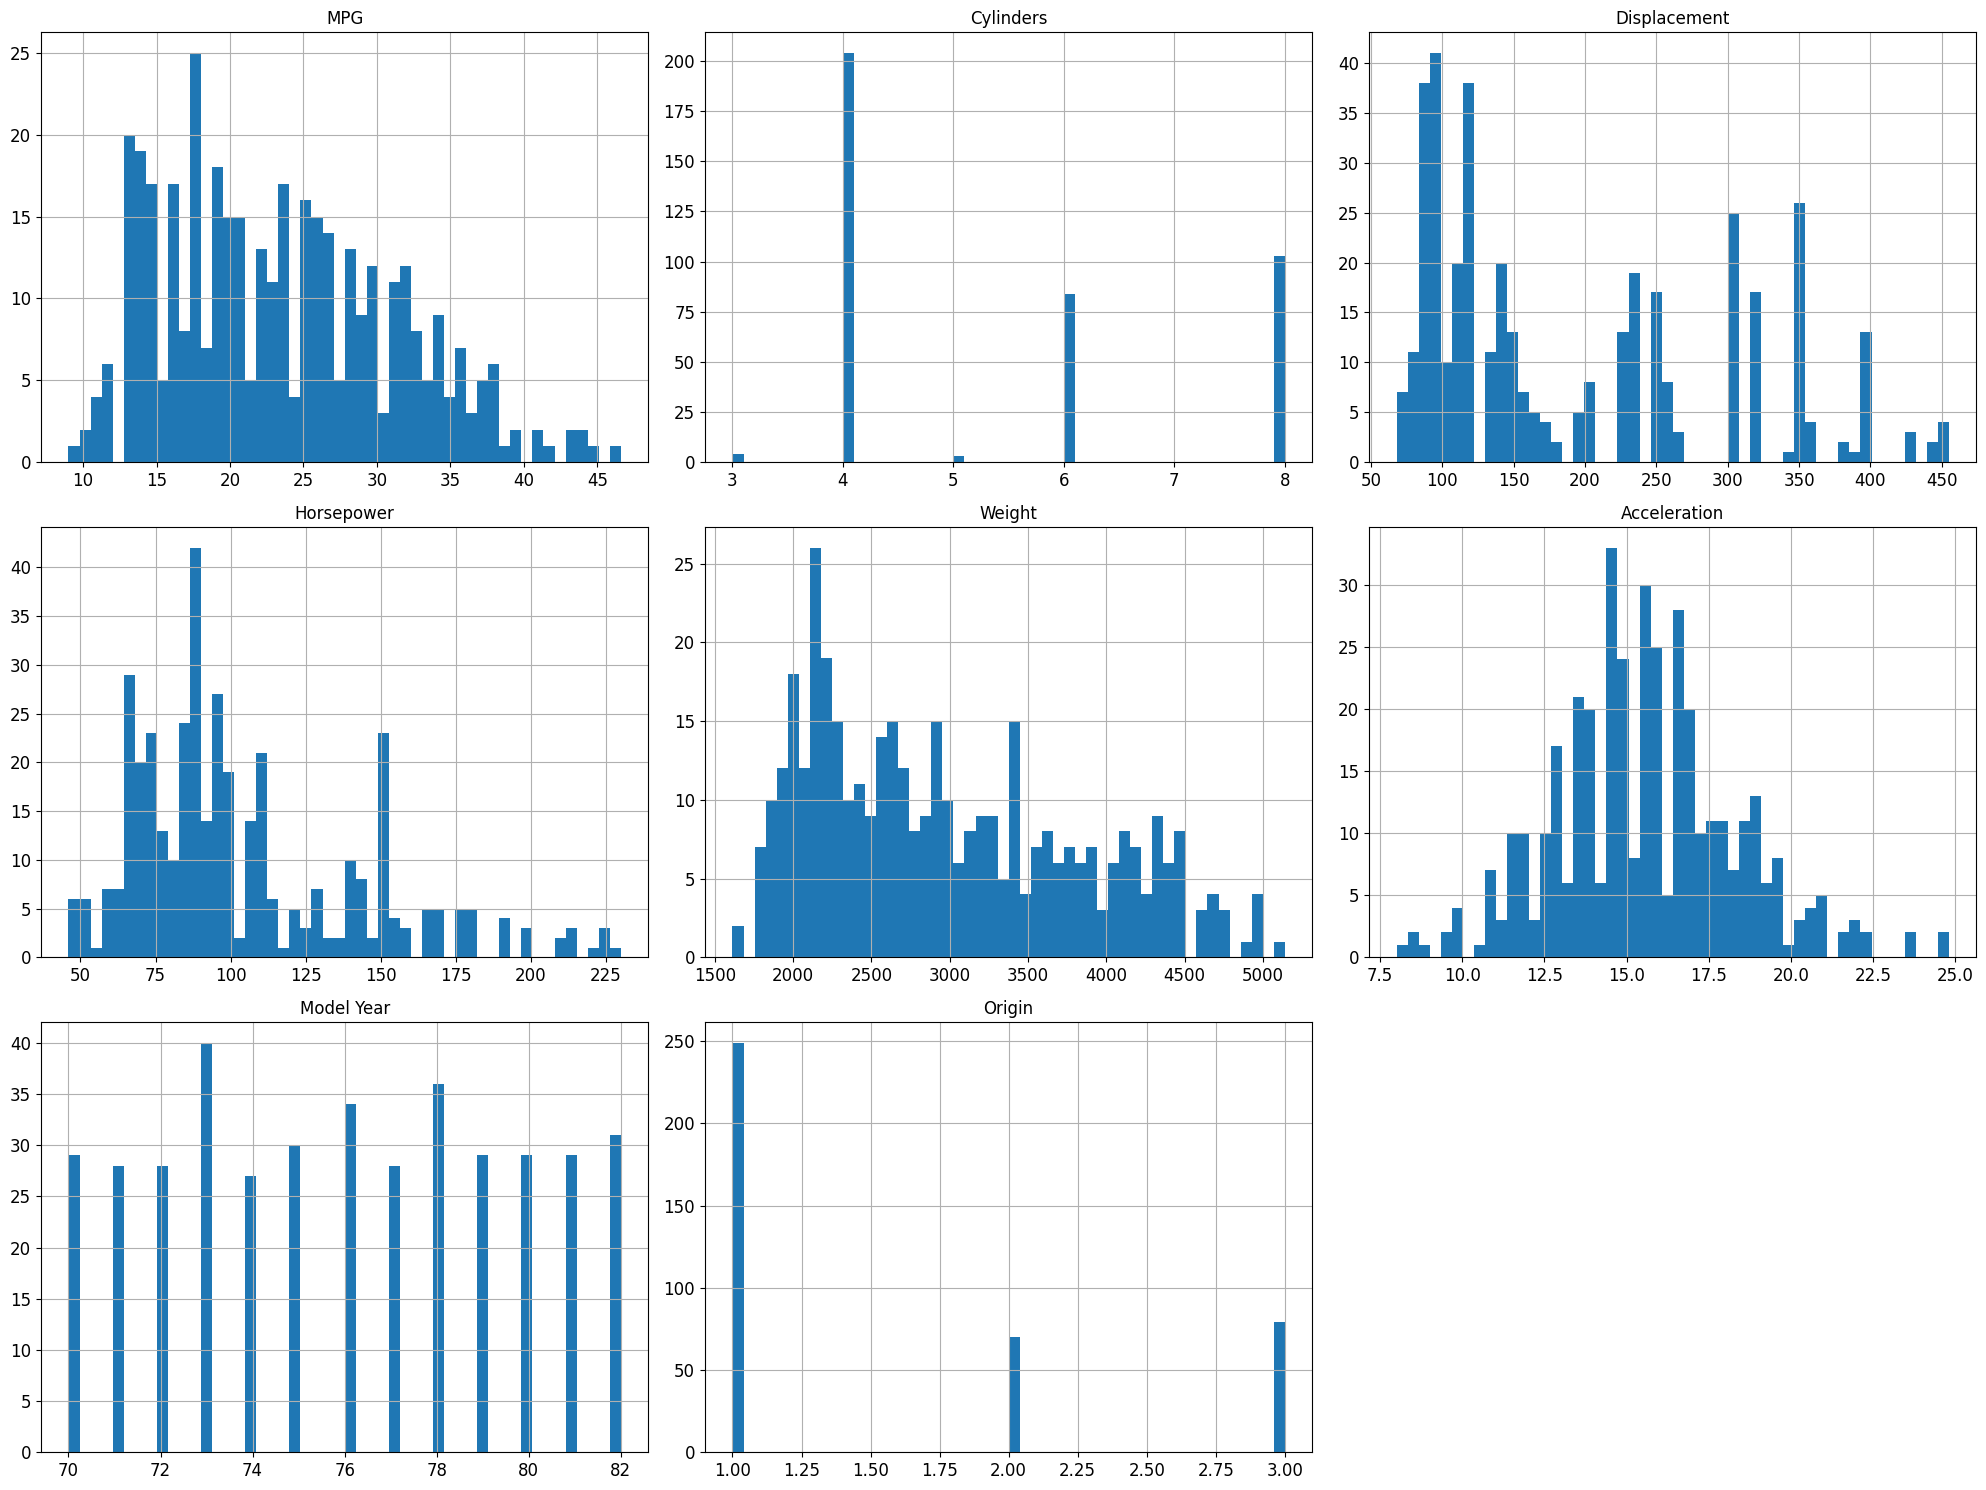

In [32]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [33]:
# Distribution in categorical variables
data['Cylinders'].value_counts() / len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [34]:
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In [35]:
data['Model Year'].value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: Model Year, dtype: int64

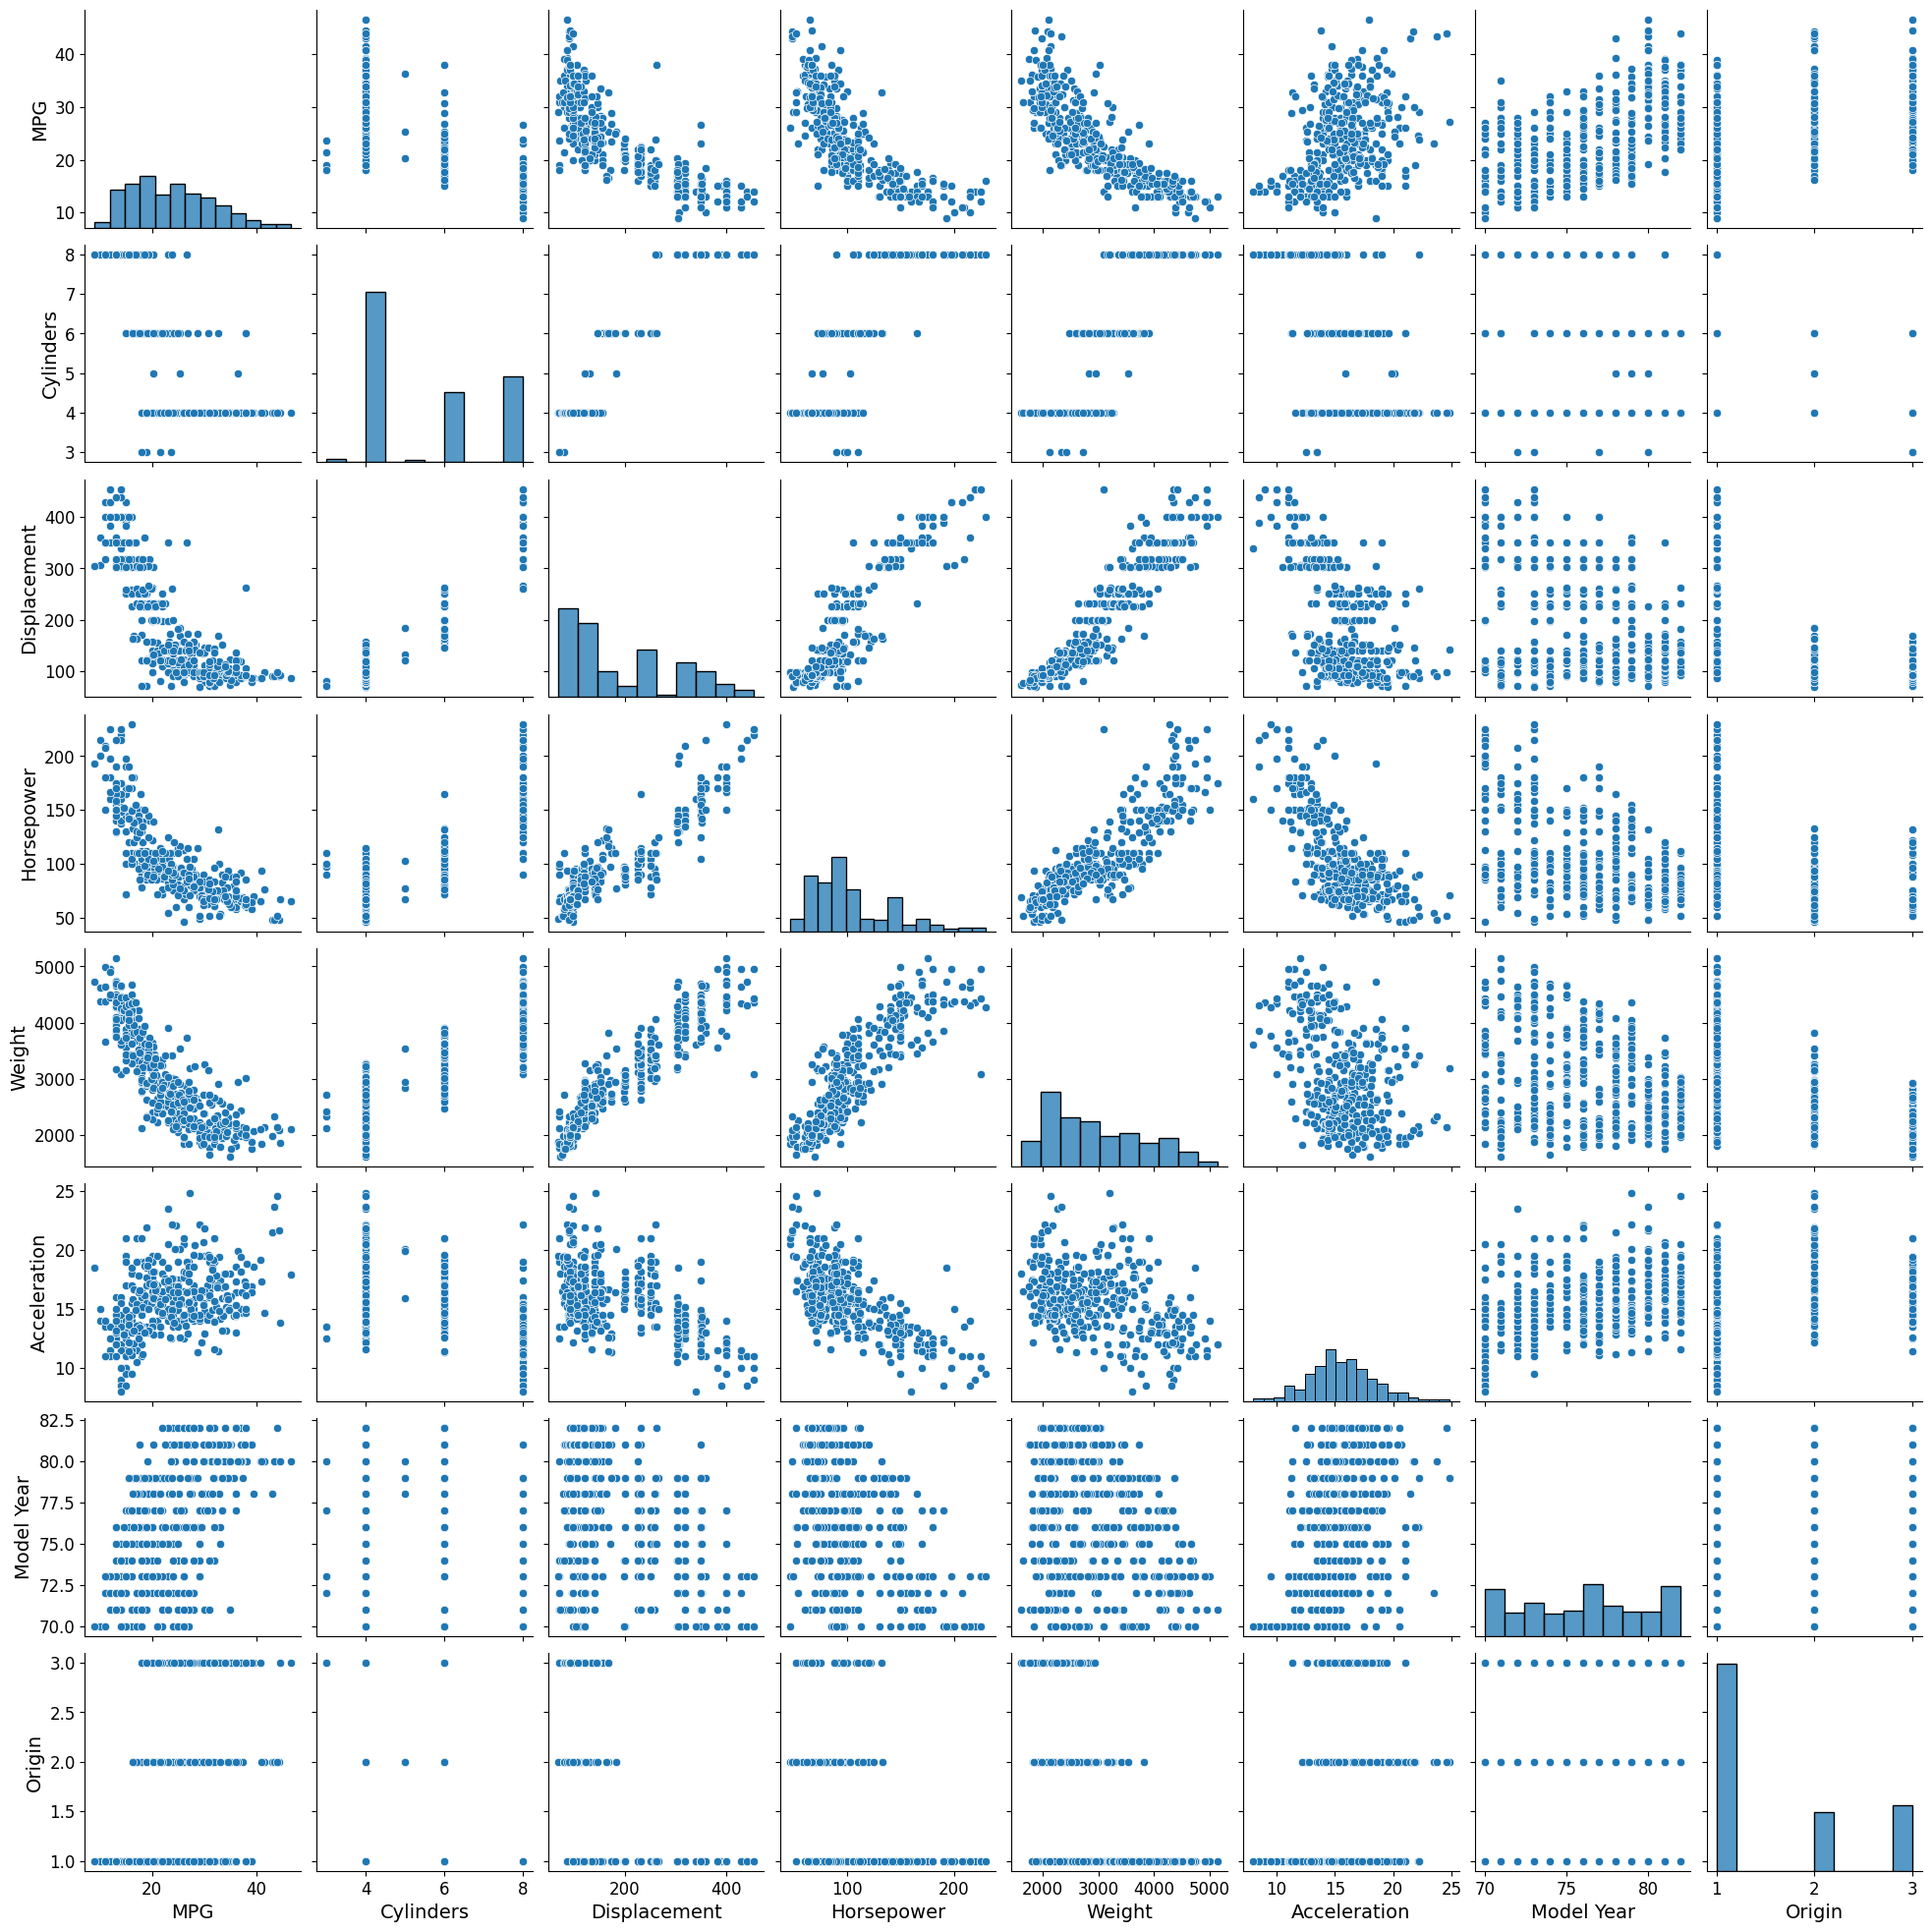

In [36]:
# Correlation Plots
sns.pairplot(data)

In [37]:
# Splitting into train and test data set using stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [38]:
# Checking new variables for correlation with mpg
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']
corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64

In [39]:
# Segregating Target and feature variables
data_target = data
data = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()
data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
375,4,105.0,74.0,1980.0,15.3,82,2
350,4,105.0,63.0,2215.0,14.9,81,1
94,8,440.0,215.0,4735.0,11.0,73,1
209,4,120.0,88.0,3270.0,21.9,76,2
267,4,134.0,95.0,2560.0,14.2,78,3
...,...,...,...,...,...,...,...
74,8,302.0,140.0,4294.0,16.0,72,1
100,6,250.0,88.0,3021.0,16.5,73,1
356,4,108.0,75.0,2350.0,16.8,81,3
240,4,97.0,78.0,2190.0,14.1,77,2


In [40]:
# Preprocessing the origin column
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "Canada", 2: "USA", 3: "Britain"})
    return df

data_tr = preprocess_origin_cols(data)
data_tr.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
375,4,105.0,74.0,1980.0,15.3,82,USA
350,4,105.0,63.0,2215.0,14.9,81,Canada
94,8,440.0,215.0,4735.0,11.0,73,Canada
209,4,120.0,88.0,3270.0,21.9,76,USA
267,4,134.0,95.0,2560.0,14.2,78,Britain


In [41]:
# One-Hot Encoding the origin column
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 375 to 319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
 6   Origin        318 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 19.9+ KB


In [42]:
# Isolating the origin column
data_cat = data_tr[["Origin"]]
data_cat.head()

,Origin
375,USA
350,Canada
94,Canada
209,USA
267,Britain


In [43]:
# One-Hot encoding allthe categorical values
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot   # returns a sparse matrix

<318x3 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

In [44]:
data_cat_1hot.toarray()[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [45]:
cat_encoder.categories_

[array(['Britain', 'Canada', 'USA'], dtype=object)]

In [46]:
# Handling missing values using Simple Imputer and segregating the numerical columns
num_data = data.iloc[:, :-1]
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 375 to 319
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 17.4 KB


In [47]:
# Handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(num_data)

SimpleImputer(strategy='median')

In [48]:
# Median of all the columns from imputer
imputer.statistics_

array([   4. ,  151. ,   92. , 2803.5,   15.5,   76. ])

In [49]:
# Median from original dataframe
data.median().values

array([   4. ,  151. ,   92. , 2803.5,   15.5,   76. ])

In [50]:
# Imputing the missing values by transforming the dataframe
X = imputer.transform(num_data)
X

array([[4.000e+00, 1.050e+02, 7.400e+01, 1.980e+03, 1.530e+01, 8.200e+01],
       [4.000e+00, 1.050e+02, 6.300e+01, 2.215e+03, 1.490e+01, 8.100e+01],
       [8.000e+00, 4.400e+02, 2.150e+02, 4.735e+03, 1.100e+01, 7.300e+01],
       ...,
       [4.000e+00, 1.080e+02, 7.500e+01, 2.350e+03, 1.680e+01, 8.100e+01],
       [4.000e+00, 9.700e+01, 7.800e+01, 2.190e+03, 1.410e+01, 7.700e+01],
       [4.000e+00, 1.200e+02, 7.500e+01, 2.542e+03, 1.750e+01, 8.000e+01]])

In [51]:
data_tr = pd.DataFrame(X, columns=num_data.columns,
                          index=num_data.index)
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 375 to 319
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    float64
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    float64
dtypes: float64(6)
memory usage: 17.4 KB


In [52]:
num_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
375,4,105.0,74.0,1980.0,15.3,82
350,4,105.0,63.0,2215.0,14.9,81
94,8,440.0,215.0,4735.0,11.0,73
209,4,120.0,88.0,3270.0,21.9,76
267,4,134.0,95.0,2560.0,14.2,78


In [53]:
# Adding attributes using BaseEstimator and TransformerMixin
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]

        return np.c_[X, acc_on_cyl]

attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]

array([4.00000000e+00, 1.05000000e+02, 7.40000000e+01, 1.98000000e+03,
       1.53000000e+01, 8.20000000e+01, 2.06756757e-01, 3.82500000e+00])

In [54]:
# Creating pipeline
from sklearn.pipeline import Pipeline

# Scaling the numerical attributes using StandardScaler
from sklearn.preprocessing import StandardScaler
numerics = ['float64', 'int64']
num_data = data_tr.select_dtypes(include=numerics)
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('attrs_adder', CustomAttrAdder()),('std_scaler', StandardScaler()),])
num_data_tr = num_pipeline.fit_transform(num_data)
num_data_tr[0]

array([-0.85657842, -0.8557922 , -0.79275594, -1.17343893, -0.11706845,
        1.59663237,  0.40577559,  0.52543651])

In [55]:
# Transforming Numerical and Categorical Attributes
from sklearn.compose import ColumnTransformer

num_attrs = list(num_data)
cat_attrs = ["Origin"]

# Full pipeline for numerical and categorical attributes
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attrs),("cat", OneHotEncoder(), cat_attrs),])
prepared_data = full_pipeline.fit_transform(data)
prepared_data[0]

array([-0.85657842, -0.8557922 , -0.79275594, -1.17343893, -0.11706845,
        1.59663237,  0.40577559,  0.52543651,  0.        ,  0.        ,
        1.        ])

In [56]:
def num_pipeline_transformer(data):
    numerics = ['float64', 'int64']
    num_attrs = data.select_dtypes(include=numerics)
    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        #('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline

def pipeline_transformer(data):
    #cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        #("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [57]:
preprocessed_df = preprocess_origin_cols(data)

In [58]:
preprocessed_df

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
375,4,105.0,74.0,1980.0,15.3,82,NaN
350,4,105.0,63.0,2215.0,14.9,81,NaN
94,8,440.0,215.0,4735.0,11.0,73,NaN
209,4,120.0,88.0,3270.0,21.9,76,NaN
267,4,134.0,95.0,2560.0,14.2,78,NaN
...,...,...,...,...,...,...,...
74,8,302.0,140.0,4294.0,16.0,72,NaN
100,6,250.0,88.0,3021.0,16.5,73,NaN
356,4,108.0,75.0,2350.0,16.8,81,NaN
240,4,97.0,78.0,2190.0,14.1,77,NaN


In [59]:
preprocessed_df = preprocessed_df.drop('Origin', axis=1)

In [60]:
# Converting raw data to prepared data
prepared_data = pipeline_transformer(preprocessed_df)
prepared_data

array([[-0.85657842, -0.8557922 , -0.79275594, -1.17343893, -0.11706845,
         1.59663237],
       [-0.85657842, -0.8557922 , -1.08768391, -0.89386967, -0.26291671,
         1.32996793],
       [ 1.50179333,  2.41461632,  2.98768444,  2.10406449, -1.6849372 ,
        -0.80334759],
       ...,
       [-0.85657842, -0.82650496, -0.7659443 , -0.73326606,  0.42986251,
         1.32996793],
       [-0.85657842, -0.93389151, -0.6855094 , -0.92361108, -0.55461322,
         0.26331017],
       [-0.85657842, -0.709356  , -0.7659443 , -0.50485202,  0.68509696,
         1.06330349]])

In [61]:
prepared_data[0]

array([-0.85657842, -0.8557922 , -0.79275594, -1.17343893, -0.11706845,
        1.59663237])

In [62]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_data, data_labels)

LinearRegression()

In [63]:
sample_data = data.iloc[:5]
sample_labels = data_labels.iloc[:5]

sample_data_prepared = pipeline_transformer(sample_data)

print("Predictions: ", lin_reg.predict(sample_data_prepared))

Predictions:  [32.35495023 30.04176879  9.15692959 20.35559464 25.71654292]


In [64]:
print("Actual Labels: ", list(sample_labels))

Actual Labels:  [36.0, 34.7, 13.0, 19.0, 27.5]


In [65]:
from sklearn.metrics import mean_squared_error
mpg_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(data_labels, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3.4397942010606903

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data, data_labels)
forest_reg_cv_scores = cross_val_score(forest_reg,
                                         prepared_data,
                                         data_labels,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

2.7854860434404722

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,4,5,6,7,8,9,10,11,12,13,14,15], 'max_features': [2,3,4,5,6,7,8]},
    {'bootstrap': [False], 'n_estimators': [3,4,5,6,7,8,9,10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(prepared_data, data_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4, 5, 6, 7, 8],
                          'n_estimators': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                           14, 15]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 13}

In [69]:
cv_scores = grid_search.cv_results_
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)

3.353533450547743 {'max_features': 2, 'n_estimators': 3}
3.151569399511855 {'max_features': 2, 'n_estimators': 4}
3.2987637408189654 {'max_features': 2, 'n_estimators': 5}
2.983933090206273 {'max_features': 2, 'n_estimators': 6}
3.1075189798304663 {'max_features': 2, 'n_estimators': 7}
3.022865474769499 {'max_features': 2, 'n_estimators': 8}
2.864706031368125 {'max_features': 2, 'n_estimators': 9}
3.114986718762139 {'max_features': 2, 'n_estimators': 10}
3.07846081471514 {'max_features': 2, 'n_estimators': 11}
3.0279586769241003 {'max_features': 2, 'n_estimators': 12}
2.903012724877013 {'max_features': 2, 'n_estimators': 13}
2.965426081763611 {'max_features': 2, 'n_estimators': 14}
3.0305220378153646 {'max_features': 2, 'n_estimators': 15}
3.308763226721095 {'max_features': 3, 'n_estimators': 3}
3.200162634869818 {'max_features': 3, 'n_estimators': 4}
3.102364284416936 {'max_features': 3, 'n_estimators': 5}
3.227505373910332 {'max_features': 3, 'n_estimators': 6}
3.0388555887324604 {'m

In [70]:
# Feature importance
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.18797397, 0.29734461, 0.06529183, 0.29789318, 0.03305072,
       0.1184457 ])

In [71]:
extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(data.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs
final_features = sorted(zip(attrs, feature_importances), reverse=True)
final_features

[('Weight', 0.29789317939243376),
 ('Model Year', 0.11844569599440556),
 ('Horsepower', 0.06529183328223308),
 ('Displacement', 0.29734460935437634),
 ('Cylinders', 0.18797396675558412),
 ('Acceleration', 0.03305071522096713)]

In [72]:
type(final_features)

list

In [73]:
final_features = pd.DataFrame(final_features)
final_features

,0,1
0,Weight,0.297893
1,Model Year,0.118446
2,Horsepower,0.065292
3,Displacement,0.297345
4,Cylinders,0.187974
5,Acceleration,0.033051


In [74]:
# Evaluating final model on test dataset
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MPG", axis=1)
y_test = strat_test_set["MPG"].copy()

X_test_preprocessed = preprocess_origin_cols(X_test)
X_test_prepared = pipeline_transformer(X_test_preprocessed)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.6521049192968555

In [75]:
# Predicting the mpg for a random configuration value
def predict_mpg(config, model):
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config

    preproc_df = preprocess_origin_cols(df)
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    print("Car's mpg value:",y_pred,"miles per gallon")

vehicle_confign = {'Cylinders': [8],'Displacement': [160],'Horsepower': [150], 'Weight': [2000],'Acceleration': [14],'Model Year': [83],'Origin': [1]}
predict_mpg(vehicle_confign, final_model)

Car's mpg value: [20.64615385] miles per gallon


In [104]:
!pip install dowhy

In [78]:
!pip install graphviz

In [79]:
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter
import dowhy.api
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [80]:
auto = data_target

In [81]:
auto = auto.rename(columns={"Model Year": "Year"})

In [82]:
auto.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,displacement_on_power,weight_on_cylinder,acceleration_on_power,acceleration_on_cyl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,2.361538,438.000,0.092308,1.5000
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,2.121212,461.625,0.069697,1.4375
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,2.120000,429.500,0.073333,1.3750
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,2.026667,429.125,0.080000,1.5000
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,2.157143,431.125,0.075000,1.3125


In [83]:
causal_graph = """digraph {
Cylinders -> MPG;
Displacement -> MPG;
Weight -> MPG;
Year -> MPG;
Horsepower -> MPG;
Acceleration -> MPG
}"""

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


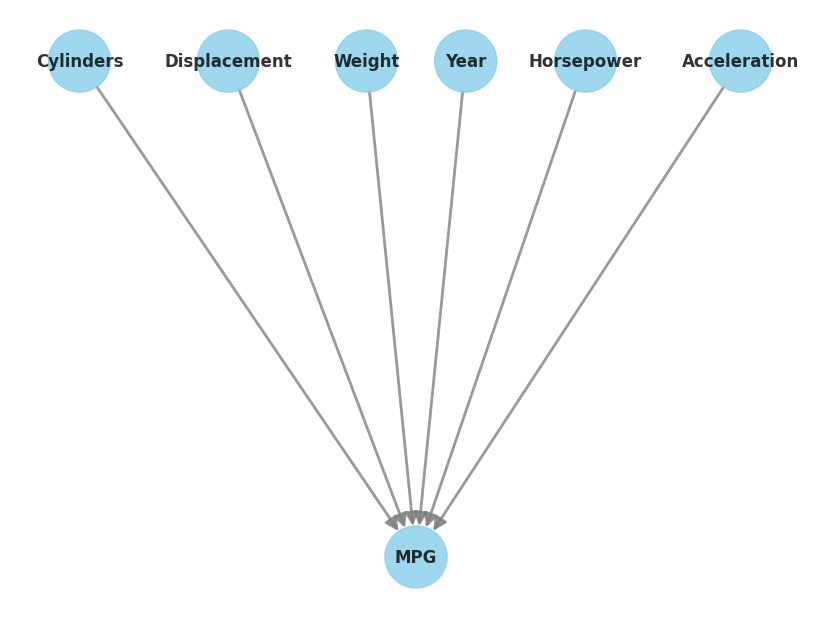

In [84]:
# Model 1 - Cylinders and MPG
model1= CausalModel(
        data=auto,
        treatment='Cylinders',
        outcome="MPG",
        graph = causal_graph.replace("\n", " "),
        common_causes=['Cylinders','Displacement','Weight','Year','Horsepower','Acceleration'])
model1.view_model()

In [85]:
identified_estimand1 = model1.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand1)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d              
────────────(E[MPG])
d[Cylinders]        
Estimand assumption 1, Unconfoundedness: If U→{Cylinders} and U→MPG then P(MPG|Cylinders,,U) = P(MPG|Cylinders,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [86]:
causal_estimate1 = model1.estimate_effect(identified_estimand1, method_name="backdoor.linear_regression",test_significance=True)
print(causal_estimate1)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d              
────────────(E[MPG])
d[Cylinders]        
Estimand assumption 1, Unconfoundedness: If U→{Cylinders} and U→MPG then P(MPG|Cylinders,,U) = P(MPG|Cylinders,)

## Realized estimand
b: MPG~Cylinders+Cylinders*Horsepower+Cylinders*Weight+Cylinders*Acceleration+Cylinders*Year+Cylinders*Displacement
Target units: ate

## Estimate
Mean value: -1.8749151824896302
p-value: [2.00001697e-15]



ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


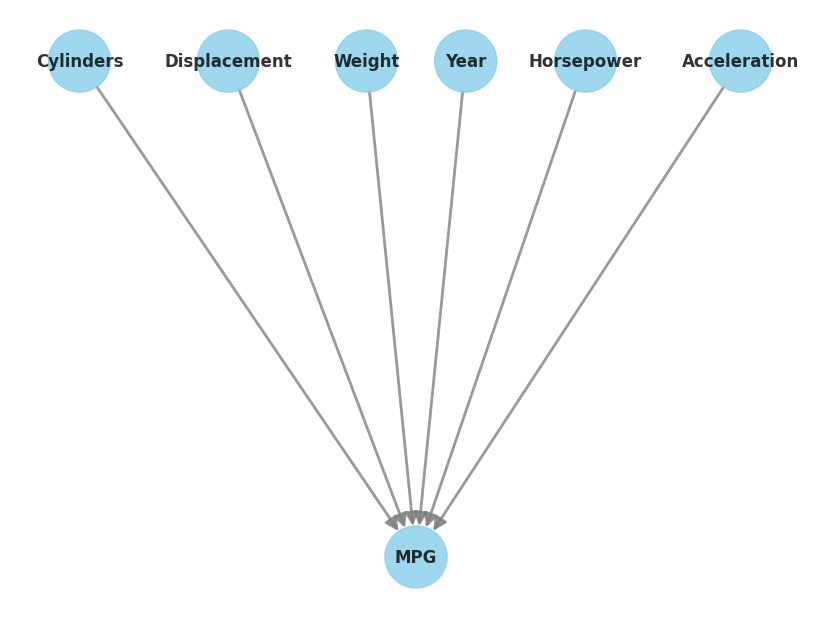

In [87]:
# Model 2 - Displacement and MPG
model2= CausalModel(
        data=auto,
        treatment='Displacement',
        outcome="MPG",
        graph = causal_graph.replace("\n", " "),
        common_causes=['Cylinders','Displacement','Weight','Year','Horsepower','Acceleration'])
model2.view_model()

In [88]:
identified_estimand2 = model2.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand2)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d               
───────────────(E[MPG])
d[Displacement]        
Estimand assumption 1, Unconfoundedness: If U→{Displacement} and U→MPG then P(MPG|Displacement,,U) = P(MPG|Displacement,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [89]:
causal_estimate2 = model2.estimate_effect(identified_estimand2, method_name="backdoor.linear_regression",test_significance=True)
print(causal_estimate2)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d               
───────────────(E[MPG])
d[Displacement]        
Estimand assumption 1, Unconfoundedness: If U→{Displacement} and U→MPG then P(MPG|Displacement,,U) = P(MPG|Displacement,)

## Realized estimand
b: MPG~Displacement+Displacement*Cylinders+Displacement*Horsepower+Displacement*Weight+Displacement*Acceleration+Displacement*Year
Target units: ate

## Estimate
Mean value: -0.07878412048781769
p-value: [2.67851297e-19]



ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


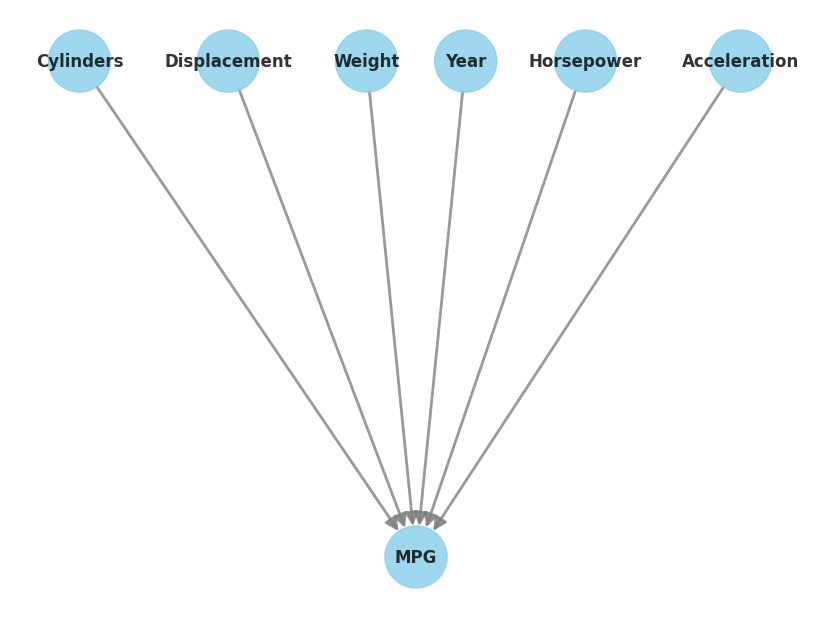

In [90]:
# Model 3 - Weight and MPG
model3= CausalModel(
        data=auto,
        treatment='Weight',
        outcome="MPG",
        graph = causal_graph.replace("\n", " "),
        common_causes=['Cylinders','Displacement','Weight','Year','Horsepower','Acceleration'])
model3.view_model()

In [91]:
identified_estimand3 = model3.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand3)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d            
─────────(E[MPG])
d[Weight]        
Estimand assumption 1, Unconfoundedness: If U→{Weight} and U→MPG then P(MPG|Weight,,U) = P(MPG|Weight,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [92]:
causal_estimate3 = model3.estimate_effect(identified_estimand3, method_name="backdoor.linear_regression",test_significance=True)
print(causal_estimate3)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d            
─────────(E[MPG])
d[Weight]        
Estimand assumption 1, Unconfoundedness: If U→{Weight} and U→MPG then P(MPG|Weight,,U) = P(MPG|Weight,)

## Realized estimand
b: MPG~Weight+Weight*Cylinders+Weight*Horsepower+Weight*Acceleration+Weight*Year+Weight*Displacement
Target units: ate

## Estimate
Mean value: -0.009607494111321557
p-value: [3.36742869e-40]



ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


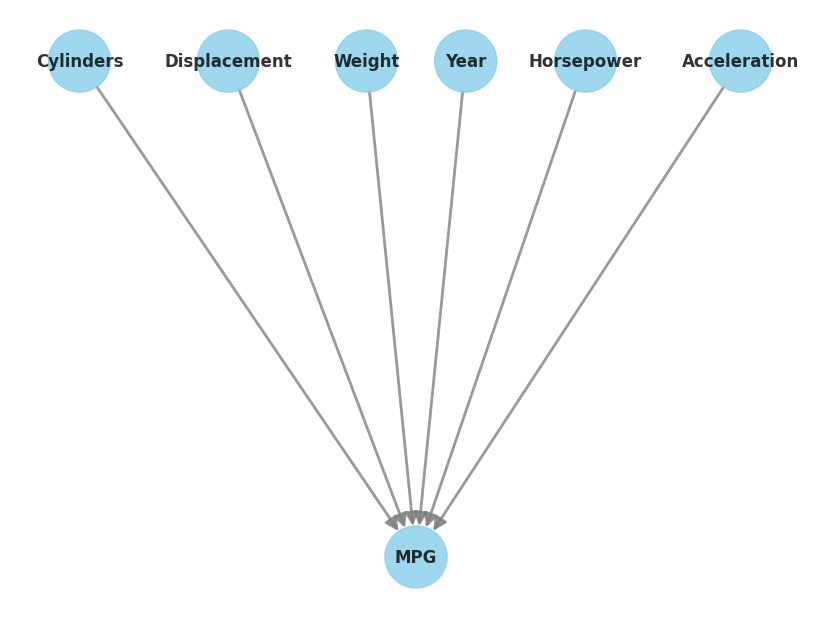

In [93]:
# Model 4 - Year and MPG
model4= CausalModel(
        data=auto,
        treatment='Year',
        outcome="MPG",
         graph = causal_graph.replace("\n", " "),
        common_causes=['Cylinders','Displacement','Weight','Year','Horsepower','Acceleration'])
model4.view_model()

In [94]:
identified_estimand4 = model4.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand4)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d           
───────(E[MPG])
d[Year]        
Estimand assumption 1, Unconfoundedness: If U→{Year} and U→MPG then P(MPG|Year,,U) = P(MPG|Year,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [95]:
causal_estimate4 = model4.estimate_effect(identified_estimand4, method_name="backdoor.linear_regression",test_significance=True)
print(causal_estimate4)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d           
───────(E[MPG])
d[Year]        
Estimand assumption 1, Unconfoundedness: If U→{Year} and U→MPG then P(MPG|Year,,U) = P(MPG|Year,)

## Realized estimand
b: MPG~Year+Year*Cylinders+Year*Weight+Year*Acceleration+Year*Horsepower+Year*Displacement
Target units: ate

## Estimate
Mean value: 0.7299889529232075
p-value: [2.04733951e-52]



ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


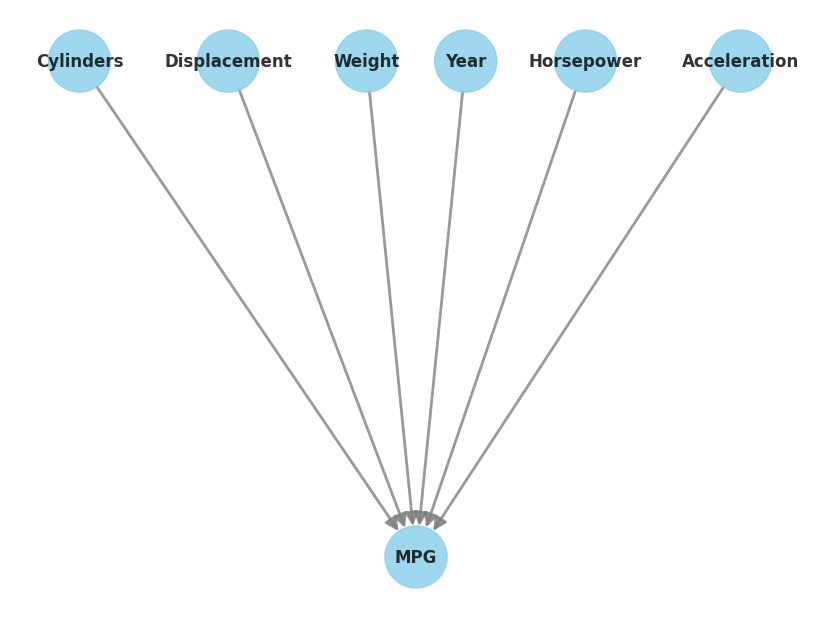

In [97]:
# Model 5 - Horsepower and MPG
model5= CausalModel(
        data=auto,
        treatment='Horsepower',
        outcome="MPG",
         graph = causal_graph.replace("\n", " "),
        common_causes=['Cylinders','Displacement','Weight','Year','Horsepower','Acceleration'])
model5.view_model()

In [98]:
identified_estimand5 = model5.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand5)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d              
─────────────(E[MPG])
d[Horsepower]        
Estimand assumption 1, Unconfoundedness: If U→{Horsepower} and U→MPG then P(MPG|Horsepower,,U) = P(MPG|Horsepower,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [99]:
causal_estimate5 = model5.estimate_effect(identified_estimand5, method_name="backdoor.linear_regression",test_significance=True)
print(causal_estimate5)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d              
─────────────(E[MPG])
d[Horsepower]        
Estimand assumption 1, Unconfoundedness: If U→{Horsepower} and U→MPG then P(MPG|Horsepower,,U) = P(MPG|Horsepower,)

## Realized estimand
b: MPG~Horsepower+Horsepower*Cylinders+Horsepower*Weight+Horsepower*Acceleration+Horsepower*Year+Horsepower*Displacement
Target units: ate

## Estimate
Mean value: -0.16755070354583523
p-value: [1.31901765e-11]



ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


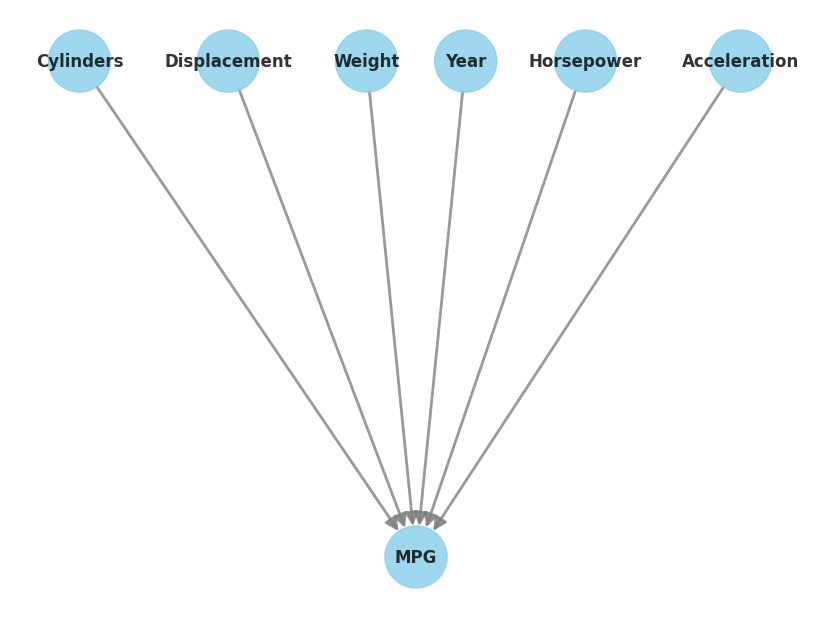

In [100]:
# Model 6 - Acceleration and MPG
model6= CausalModel(
        data=auto,
        treatment='Acceleration',
        outcome="MPG",
         graph = causal_graph.replace("\n", " "),
        common_causes=['Cylinders','Displacement','Weight','Year','Horsepower','Acceleration'])
model6.view_model()

In [101]:
identified_estimand6 = model6.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand6)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d               
───────────────(E[MPG])
d[Acceleration]        
Estimand assumption 1, Unconfoundedness: If U→{Acceleration} and U→MPG then P(MPG|Acceleration,,U) = P(MPG|Acceleration,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [102]:
causal_estimate6 = model6.estimate_effect(identified_estimand6, method_name="backdoor.linear_regression",test_significance=True)
print(causal_estimate6)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d               
───────────────(E[MPG])
d[Acceleration]        
Estimand assumption 1, Unconfoundedness: If U→{Acceleration} and U→MPG then P(MPG|Acceleration,,U) = P(MPG|Acceleration,)

## Realized estimand
b: MPG~Acceleration+Acceleration*Cylinders+Acceleration*Horsepower+Acceleration*Weight+Acceleration*Year+Acceleration*Displacement
Target units: ate

## Estimate
Mean value: -0.16954718740887387
p-value: [8.29708534e-24]



In [106]:
import pandas as pd

# Create a dictionary to store the data
data = {
    'Treatment': ['Cylinders', 'Displacement', 'Weight', 'Year', 'Horsepower', 'Acceleration'],
    'Causal Effect': [-1.8759, -0.0788, -0.0096, 0.7300, -0.1676, -0.1695],
    'p-value': [2.0000e-15, 2.6785e-19, 3.3674e-40, 2.0473e-52, 1.3190e-11, 8.2971e-24]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Add the target variable
df['Target Variable'] = 'MPG'

# Reorder the columns
df = df[['Target Variable', 'Treatment', 'Causal Effect', 'p-value']]

# Display the table
print(df)


  Target Variable     Treatment  Causal Effect       p-value
0             MPG     Cylinders        -1.8759  2.000000e-15
1             MPG  Displacement        -0.0788  2.678500e-19
2             MPG        Weight        -0.0096  3.367400e-40
3             MPG          Year         0.7300  2.047300e-52
4             MPG    Horsepower        -0.1676  1.319000e-11
5             MPG  Acceleration        -0.1695  8.297100e-24
